<a href="https://colab.research.google.com/github/IsuruMahakumara/microsoft-ai-ml-engineering/blob/main/Implementation_of_deep_learning_techniques_AutoEndcoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

#### display_mnist_image

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def display_mnist_image(X_data, index, title="MNIST Image"):
    """
    Displays a single 28x28 grayscale image from a flattened MNIST dataset.

    Args:
        X_data (np.ndarray): The flattened dataset (e.g., X_train or X_test)
                             with shape (num_samples, 784).
        index (int): The index of the image to display in X_data.
        title (str): The title to display above the image.
    """
    # 1. Select the flattened image vector
    image_flat = X_data[index]

    # 2. Reshape the 784-element vector back to a 28x28 matrix
    try:
        image_matrix = image_flat.reshape(28, 28)
    except ValueError:
        print("Error: The selected vector could not be reshaped to 28x28.")
        print("Ensure your input array has 784 elements per image.")
        return

    # 3. Use Matplotlib's imshow function to display the matrix
    plt.figure(figsize=(4, 4))
    plt.imshow(image_matrix, cmap='gray')
    plt.title(f"{title}\nIndex: {index}")
    plt.axis('off')
    plt.show()

# --- Example Usage (Assuming X_test is already loaded and flattened) ---

# To display the 10th image (index 9) from your X_test:
# display_mnist_image(X_test, 9, title="Test Image Example")

# To display the first image (index 0)
# display_mnist_image(X_test, 0)

#### Loading MNIST

In [3]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


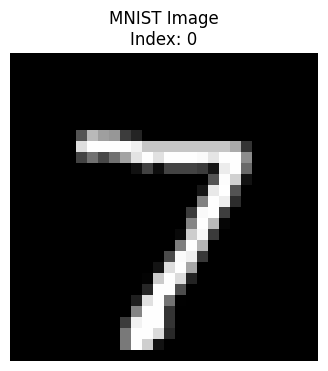

In [8]:
display_mnist_image(X_test, 0)

In [18]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Reconstructed output
])

# Build the autoencoder model
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test), verbose=1)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0959 - val_loss: 0.0340
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0308 - val_loss: 0.0218
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0211 - val_loss: 0.0177
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0175 - val_loss: 0.0152
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0152 - val_loss: 0.0137
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0128 - val_loss: 0.0119
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Autoencoder Reconstruction MSE: 0.008351276628673077


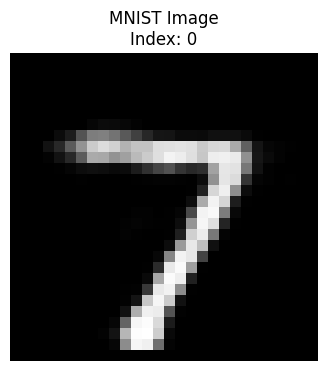

In [20]:
display_mnist_image(reconstructed_images,0)

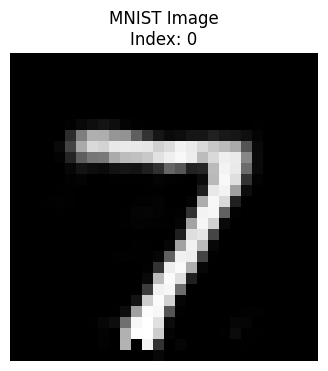

In [14]:
display_mnist_image(reconstructed_images,0)

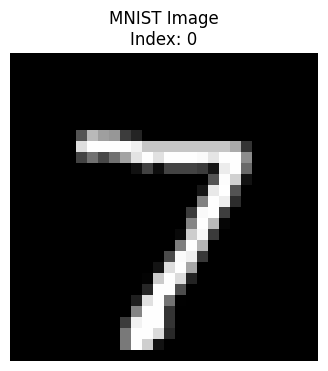

In [15]:
display_mnist_image(X_test, 0)

In [21]:
autoencoder.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 32)             │       121,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 679,442 (2.59 MB)

 Trainable params: 226,480 (884.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 452,962 (1.73 MB)

In [22]:
trained_encoder = autoencoder.layers[0]
trained_encoder.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,120 (473.12 KB)

 Trainable params: 121,120 (473.12 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
trained_dencoder = autoencoder.layers[1]
trained_dencoder.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)